In [ ]:
# python basics

In [ ]:
#Linear Models for Regression

In [ ]:
#Collecting the data¶


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

In [2]:
# Loading the data

X, y = fetch_california_housing(return_X_y=True)

In [3]:
type(X)

numpy.ndarray

In [4]:
type(y)

numpy.ndarray

In [6]:
import urllib.request 

data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/housing.csv'

def download_read_data(path):
    
    """
     Function to retrieve data from the data paths
     And to read the data as a pandas dataframe
  
    To return the dataframe
    """ 
    
      ## Only retrieve the directory of the data

    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(path)
    
    return data

In [7]:
cal_data = download_read_data(data_path)

In [8]:
cal_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
cal_data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [10]:
cal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
len(cal_data)

20640

In [12]:
len(cal_data.columns)

10

In [ ]:
#Exploratory Data Analysis

In [ ]:
#So to split the data, sklearn provides a function for that. 

In [13]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(cal_data, test_size=0.1,random_state=20)

In [14]:
print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

The size of training data is: 18576 
The size of testing data is: 2064


In [15]:
# Let's copy the training data to revert it in case we mess things up

cal_train = train_data.copy()

In [16]:
# By default, describe shows the stats of the numerical features. 
# include paramater gives us option to show all features 

train_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,18576.0,NaN,NaN,NaN,-119.56753,2.000581,-124.35,-121.79,-118.49,-118.01,-114.49
latitude,18576.0,NaN,NaN,NaN,35.630217,2.13326,32.54,33.93,34.26,37.71,41.95
housing_median_age,18576.0,NaN,NaN,NaN,28.661068,12.604039,1.0,18.0,29.0,37.0,52.0
total_rooms,18576.0,NaN,NaN,NaN,2631.567453,2169.46745,2.0,1445.0,2127.0,3149.0,39320.0
total_bedrooms,18390.0,NaN,NaN,NaN,537.344698,417.672864,1.0,295.0,435.0,648.0,6445.0
population,18576.0,NaN,NaN,NaN,1422.408376,1105.486111,3.0,785.75,1166.0,1725.0,28566.0
households,18576.0,NaN,NaN,NaN,499.277078,379.473497,1.0,279.0,410.0,606.0,6082.0
median_income,18576.0,NaN,NaN,NaN,3.870053,1.900225,0.4999,2.5643,3.5341,4.742725,15.0001
median_house_value,18576.0,NaN,NaN,NaN,206881.011305,115237.605962,14999.0,120000.0,179800.0,264700.0,500001.0
ocean_proximity,18576,5,<1H OCEAN,8231,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
train_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        186
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [18]:
train_data['ocean_proximity'].value_counts()

<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: ocean_proximity, dtype: int64

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

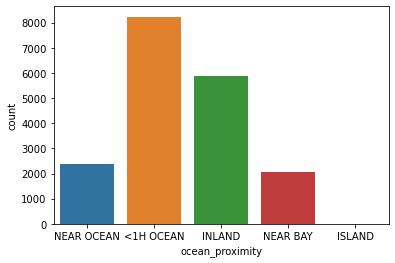

In [19]:
sns.countplot(data=train_data, x='ocean_proximity')

In [20]:
correlation = train_data.corr()
correlation['median_house_value']

longitude            -0.048622
latitude             -0.142543
housing_median_age    0.105237
total_rooms           0.133927
total_bedrooms        0.049672
population           -0.026109
households            0.065508
median_income         0.685433
median_house_value    1.000000
Name: median_house_value, dtype: float64

<AxesSubplot:>

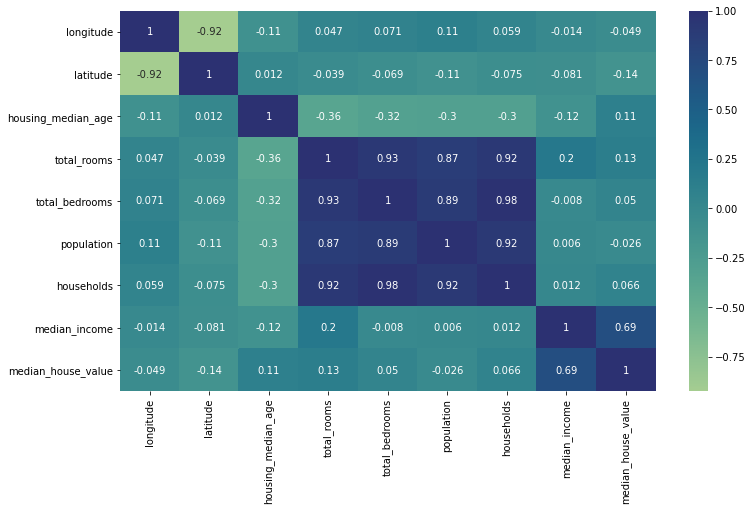

In [21]:
#### Visualizing correlation

plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot=True,cmap='crest')

In [ ]:
#Data Preprocessing

In [23]:
training_input_data = train_data.drop('median_house_value', axis=1)
training_labels = train_data['median_house_value']

In [24]:
training_input_data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
8101,-118.21,33.80,41.0,1251.0,279.0,1053.0,278.0,3.2778,NEAR OCEAN
9757,-121.44,36.51,31.0,1636.0,380.0,1468.0,339.0,3.2219,<1H OCEAN
16837,-122.48,37.59,29.0,5889.0,959.0,2784.0,923.0,5.3991,NEAR OCEAN


In [25]:
training_labels.head()

8101     150800.0
9757     114700.0
16837    273000.0
11742    193100.0
1871     173400.0
Name: median_house_value, dtype: float64

In [ ]:
#Handling Missing Values¶


In [26]:
from sklearn.impute import SimpleImputer

# We are going to impute all numerical features
# Ideally, we would only impute bed_rooms because it's the one possessing NaNs

num_feats = training_input_data.drop('ocean_proximity', axis=1)

In [27]:
def handle_missing_values(input_data):
  """
  Docstring 

  # This is a function to take numerical features...
  ...and impute the missing values
  # We are filling missing values with mean
  # fit_transform fit the imputer on input data and transform it immediately
  # You can use fit(input_data) and then transform(input_data) or
  # Or do it at once with fit.transform(input_data)
  # Imputer returns the imputed data as a NumPy array 
  # We will convert it back to Pandas dataframe

  """
  mean_imputer = SimpleImputer(strategy='mean')
  num_feats_imputed = mean_imputer.fit_transform(input_data)
  num_feats_imputed = pd.DataFrame(num_feats_imputed, 
                            columns=input_data.columns, index=input_data.index )


  return num_feats_imputed

In [28]:
num_feats_imputed = handle_missing_values(num_feats)
num_feats_imputed.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [29]:
training_input_data['ocean_proximity'].value_counts()

<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: ocean_proximity, dtype: int64

In [ ]:
#Mapping

In [30]:
cat_feats = training_input_data['ocean_proximity']
cat_feats.value_counts()

<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: ocean_proximity, dtype: int64

In [31]:
feat_map = {
      '<1H OCEAN': 0,
      'INLAND': 1,
      'NEAR OCEAN': 2,
      'NEAR BAY': 3, 
      'ISLAND': 4
}

cat_feats_encoded = cat_feats.map(feat_map)

In [32]:
cat_feats_encoded.head()

8101     2
9757     0
16837    2
11742    1
1871     1
Name: ocean_proximity, dtype: int64

In [33]:
#One Hot Encoding

In [34]:
from sklearn.preprocessing import OneHotEncoder

def one_hot(input_data):

  one_hot_encoder = OneHotEncoder()
  output = one_hot_encoder.fit_transform(input_data)
  
  # The output of one hot encoder is a sparse matrix. 
  # It's best to convert it into numpy array 
  output = output.toarray()

  return output

In [35]:
cat_feats = training_input_data[['ocean_proximity']]

cat_feats_hot = one_hot(cat_feats)

cat_feats_hot

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [36]:
#Scaling Numerical features

In [37]:
## Normalizing numerical features 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_scaled = scaler.fit_transform(num_feats)
num_scaled

array([[0.62271805, 0.13390011, 0.78431373, ..., 0.03676084, 0.04555172,
        0.19157667],
       [0.29513185, 0.4218916 , 0.58823529, ..., 0.05129013, 0.05558296,
        0.18772155],
       [0.18965517, 0.53666312, 0.54901961, ..., 0.09736372, 0.1516198 ,
        0.3378712 ],
       ...,
       [0.74340771, 0.02763018, 0.58823529, ..., 0.03942163, 0.07383654,
        0.27298934],
       [0.61663286, 0.16578108, 0.78431373, ..., 0.04764906, 0.11609933,
        0.36398808],
       [0.19269777, 0.55791711, 0.88235294, ..., 0.02653783, 0.07432988,
        0.22199004]])

In [38]:
## Standardizing numerical features 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_scaled = scaler.fit_transform(num_feats)
num_scaled

array([[ 0.67858615, -0.85796668,  0.97899282, ..., -0.33416821,
        -0.58313172, -0.31168387],
       [-0.93598814,  0.41242353,  0.18557502, ...,  0.04124236,
        -0.42237836, -0.34110223],
       [-1.45585107,  0.9187045 ,  0.02689146, ...,  1.23170093,
         1.11663747,  0.80468775],
       ...,
       [ 1.27342931, -1.32674535,  0.18557502, ..., -0.26541833,
        -0.12985994,  0.30957512],
       [ 0.64859406, -0.71733307,  0.97899282, ..., -0.05283644,
         0.54741244,  1.00398532],
       [-1.44085502,  1.01246024,  1.37570172, ..., -0.59831252,
        -0.12195403, -0.07959982]])

In [ ]:
# All Data Preprocessing Steps Into A Single Pipeline

In [ ]:
#Creating a numerical features pipeline

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
num_feats_pipe = Pipeline([
                  ('imputer', SimpleImputer(strategy='mean')), 
                  ('scaler', StandardScaler())         
            ])

num_feats_preprocessed = num_feats_pipe.fit_transform(num_feats)

In [41]:
num_feats_preprocessed

array([[ 0.67858615, -0.85796668,  0.97899282, ..., -0.33416821,
        -0.58313172, -0.31168387],
       [-0.93598814,  0.41242353,  0.18557502, ...,  0.04124236,
        -0.42237836, -0.34110223],
       [-1.45585107,  0.9187045 ,  0.02689146, ...,  1.23170093,
         1.11663747,  0.80468775],
       ...,
       [ 1.27342931, -1.32674535,  0.18557502, ..., -0.26541833,
        -0.12985994,  0.30957512],
       [ 0.64859406, -0.71733307,  0.97899282, ..., -0.05283644,
         0.54741244,  1.00398532],
       [-1.44085502,  1.01246024,  1.37570172, ..., -0.59831252,
        -0.12195403, -0.07959982]])

In [ ]:
#Pipeline for transforming Categorical Features

In [42]:
cat_feats_pipe = Pipeline([
     ('encoder', OneHotEncoder())                      
])

cat_feats_preprocessed = cat_feats_pipe.fit_transform(cat_feats)

In [ ]:
#Final Data Processing Pipeline

In [44]:
from sklearn.compose import ColumnTransformer

# The transformer requires lists of features

num_list = list(num_feats)
cat_list = list(cat_feats)

final_pipe = ColumnTransformer([
   ('num', num_feats_pipe, num_list),    
   ('cat', cat_feats_pipe, cat_list)                        

])

training_data_preprocessed = final_pipe.fit_transform(training_input_data)

In [45]:
training_data_preprocessed

array([[ 0.67858615, -0.85796668,  0.97899282, ...,  0.        ,
         0.        ,  1.        ],
       [-0.93598814,  0.41242353,  0.18557502, ...,  0.        ,
         0.        ,  0.        ],
       [-1.45585107,  0.9187045 ,  0.02689146, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.27342931, -1.32674535,  0.18557502, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64859406, -0.71733307,  0.97899282, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44085502,  1.01246024,  1.37570172, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
#Choosing and Training a model

In [46]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

In [47]:
reg_model.fit(training_data_preprocessed, training_labels)

LinearRegression()

In [48]:
# Coef or coefficients are referred to as weights

reg_model.coef_

array([-55263.30927452, -56439.9137407 ,  13168.07604103,  -7925.04690235,
        27745.66496461, -50635.65732685,  35554.21578029,  72788.96303579,
       -22102.99609181, -60373.27017952, 127304.48624811, -26150.80577065,
       -18677.41420614])

In [49]:
# Intercept is what can be compared to the bias 

reg_model.intercept_

241108.2459100915

In [50]:
from sklearn.metrics import mean_squared_error

predictions = reg_model.predict(training_data_preprocessed)

In [51]:
mse = mean_squared_error(training_labels, predictions)

rmse = np.sqrt(mse)
rmse 

68438.90385283883

In [52]:
train_data.describe().median_house_value['mean']

206881.01130490957

In [ ]:
#Model evaluation with cross validation

In [53]:
from sklearn.model_selection import cross_val_score

scoring = 'neg_root_mean_squared_error' 

scores = cross_val_score(reg_model, training_data_preprocessed, training_labels, scoring=scoring, cv=10)

In [54]:
# You can use `metrics.SCORERS.keys()` to display the metrics scoring that you can use. 

#from sklearn import metrics

#metrics.SCORERS.keys()

In [55]:
scores = -scores

scores.mean()

68491.40480256345

In [56]:
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(reg_model, training_data_preprocessed, training_labels, cv=10)

In [57]:
mse_cross_val = mean_squared_error(training_labels, predictions)
rmse_cross_val = np.sqrt(mse_cross_val)
rmse_cross_val 

68537.09704554168

In [ ]:
test_input_data = test_data.drop('median_house_value', axis=1)
test_labels = test_data['median_house_value']


test_preprocessed = final_pipe.transform(test_input_data)